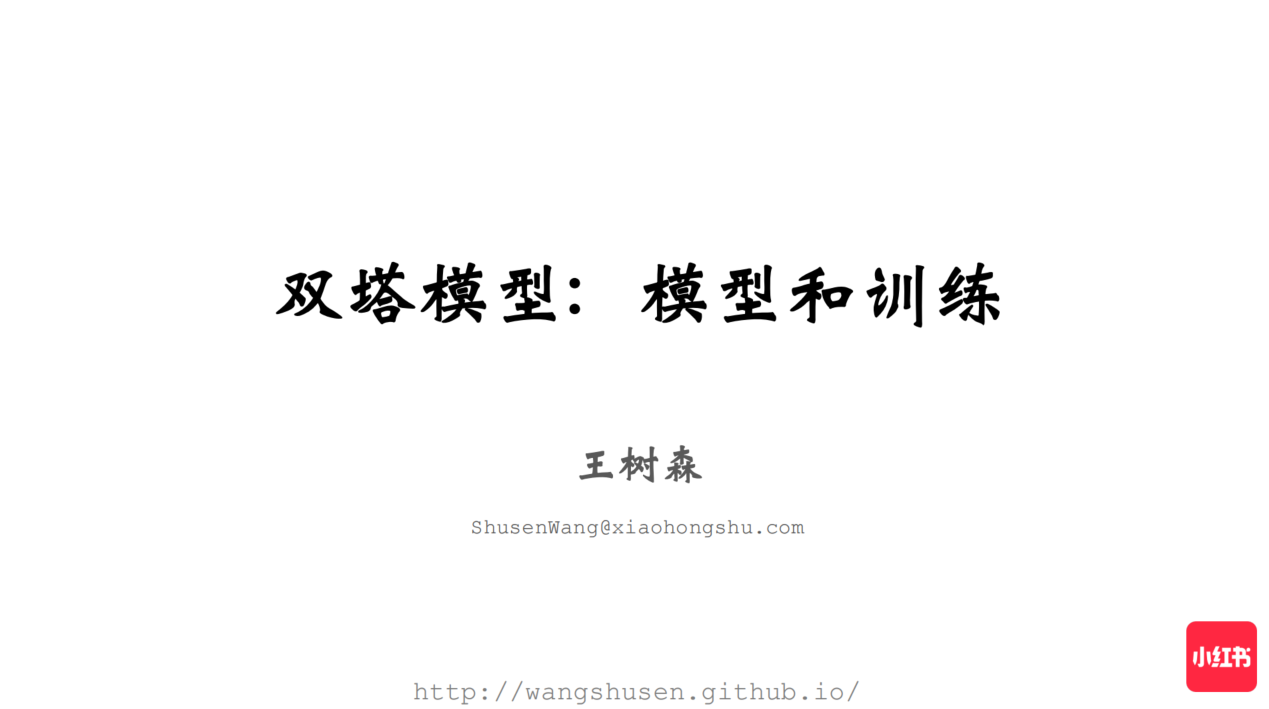

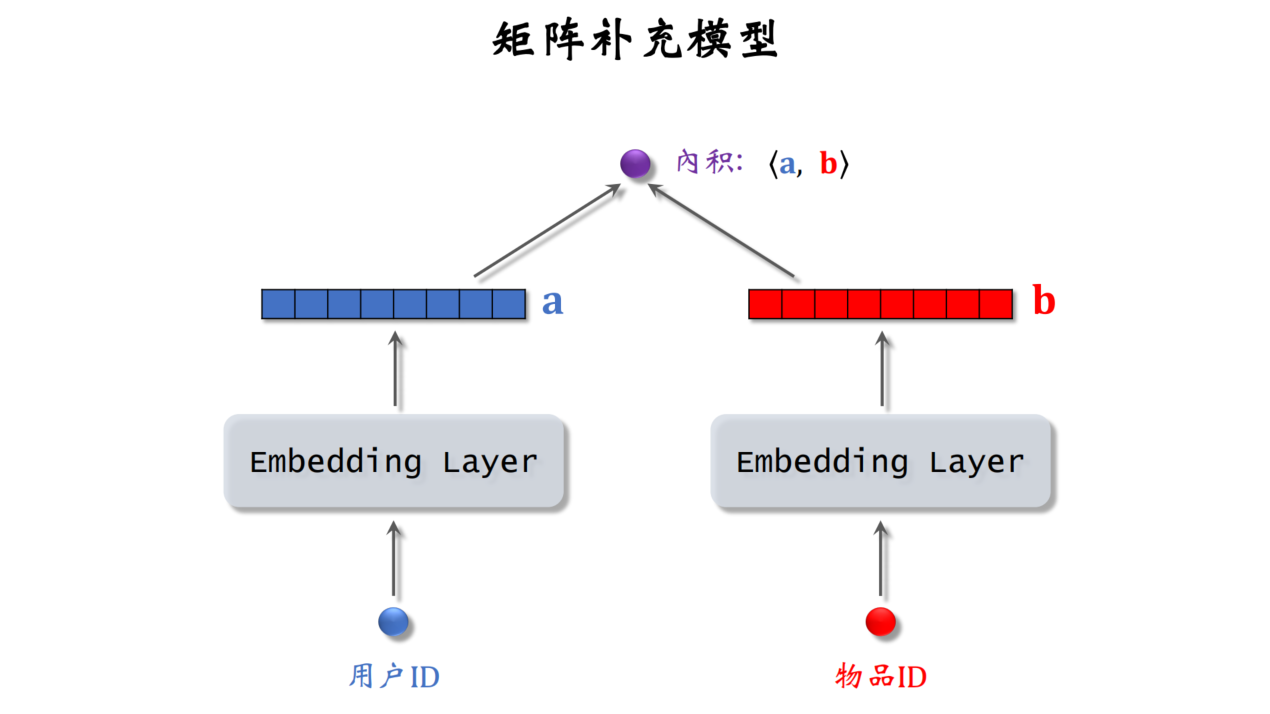

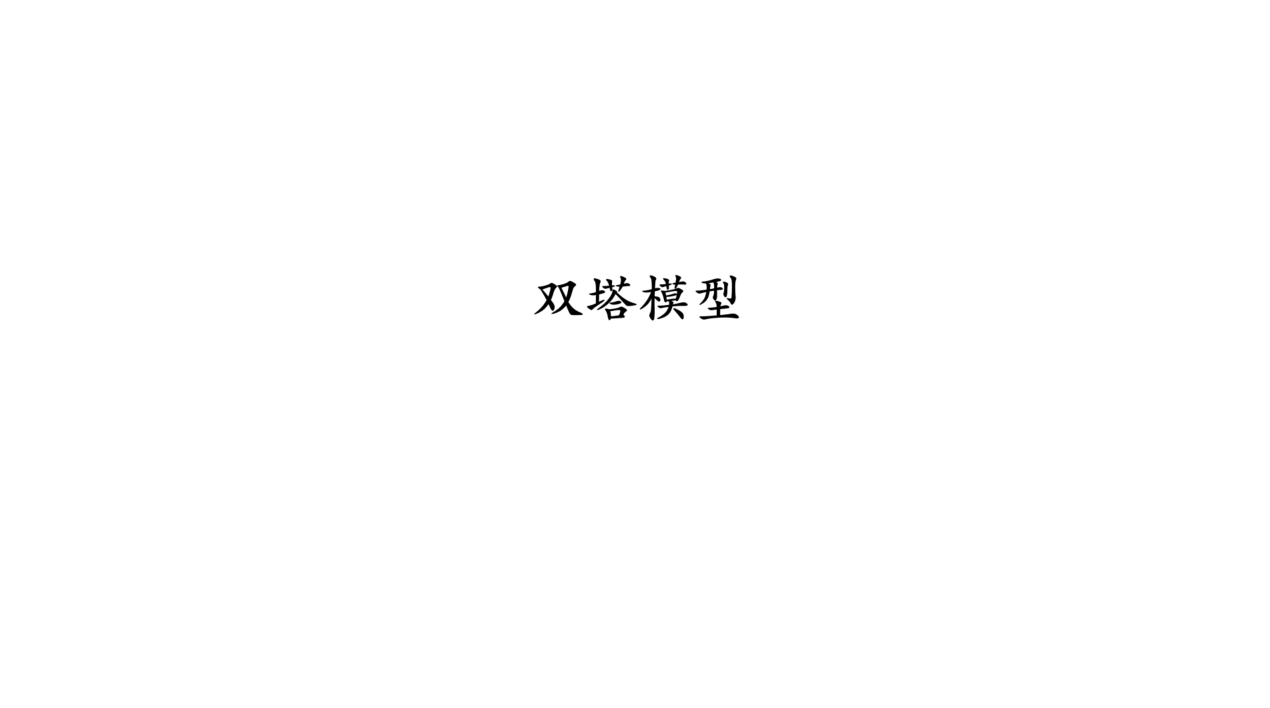

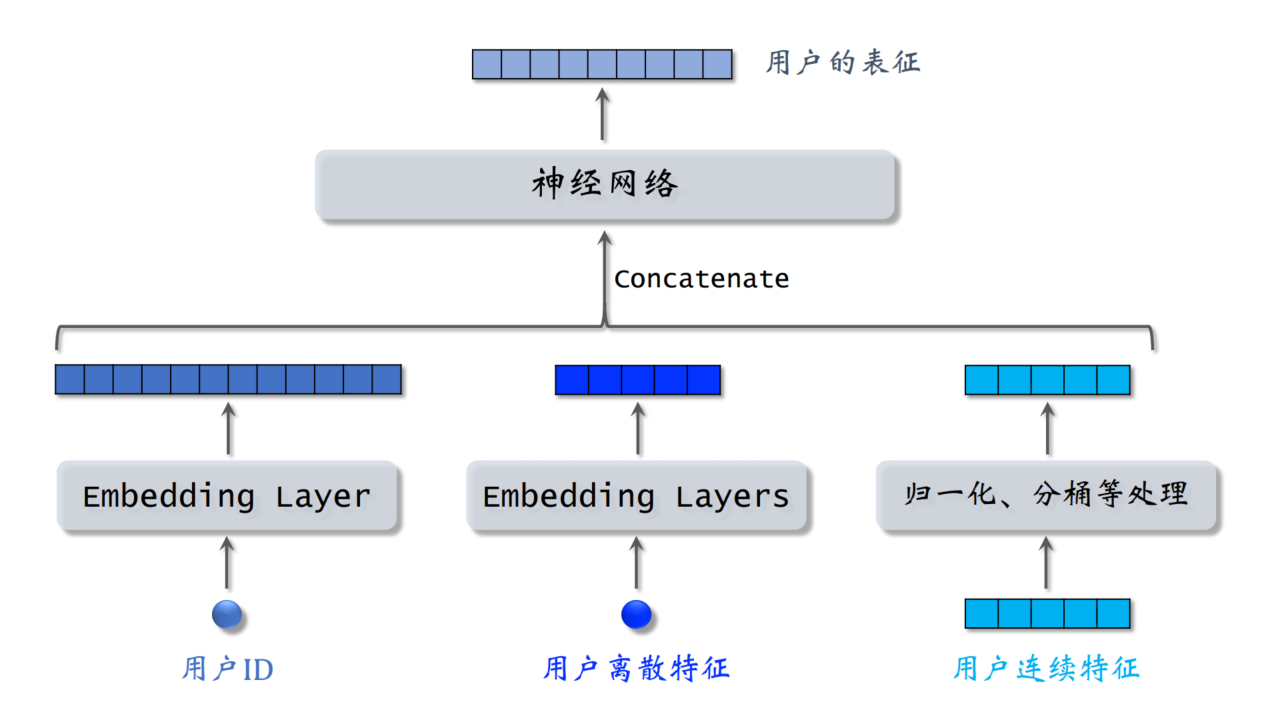

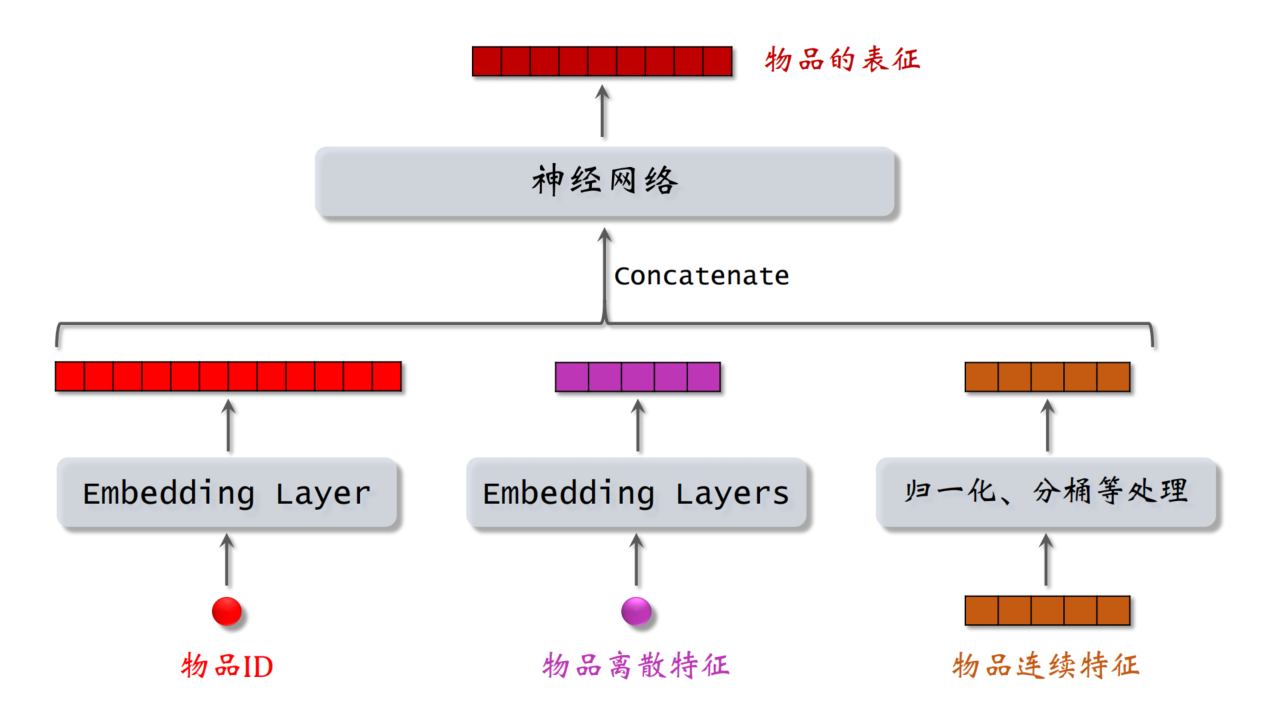

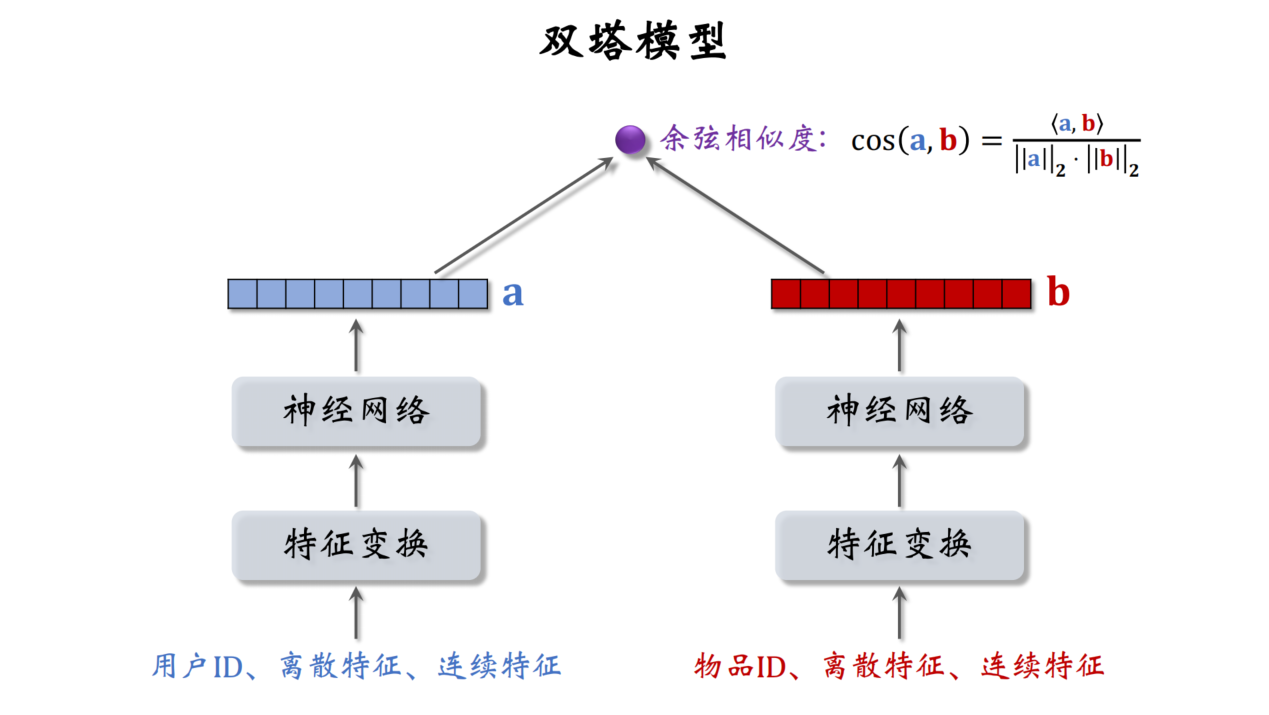

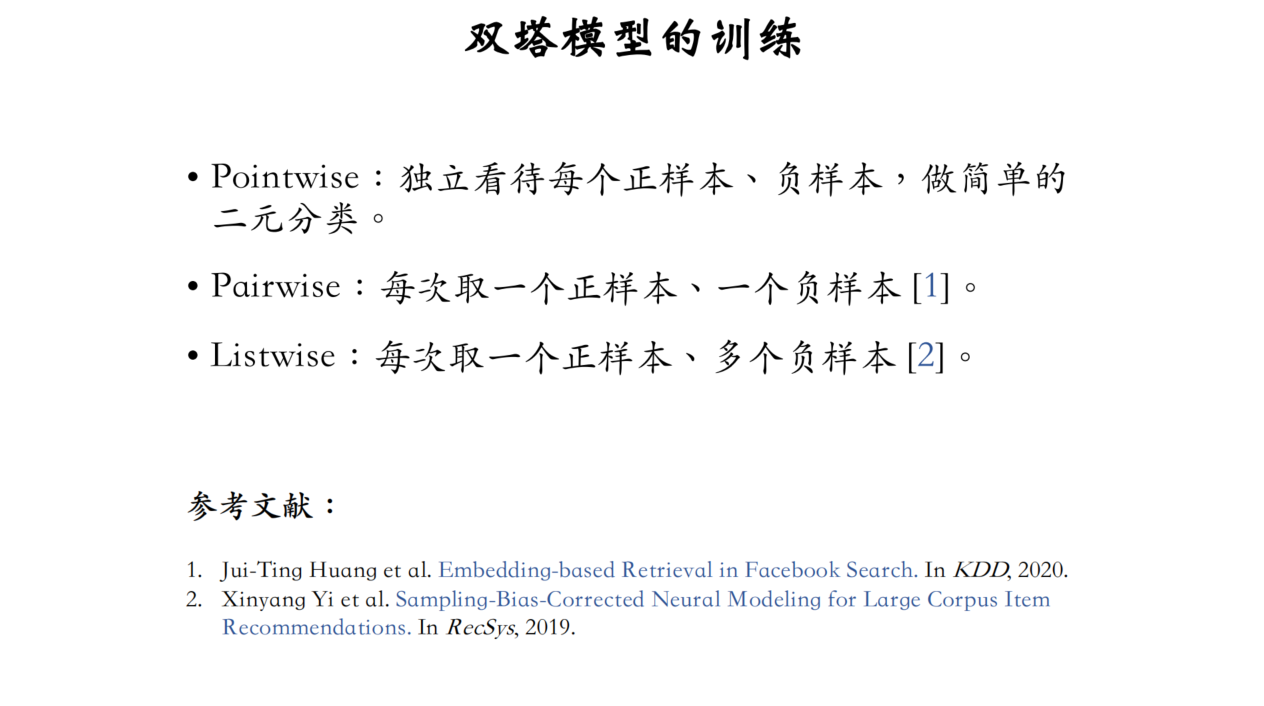

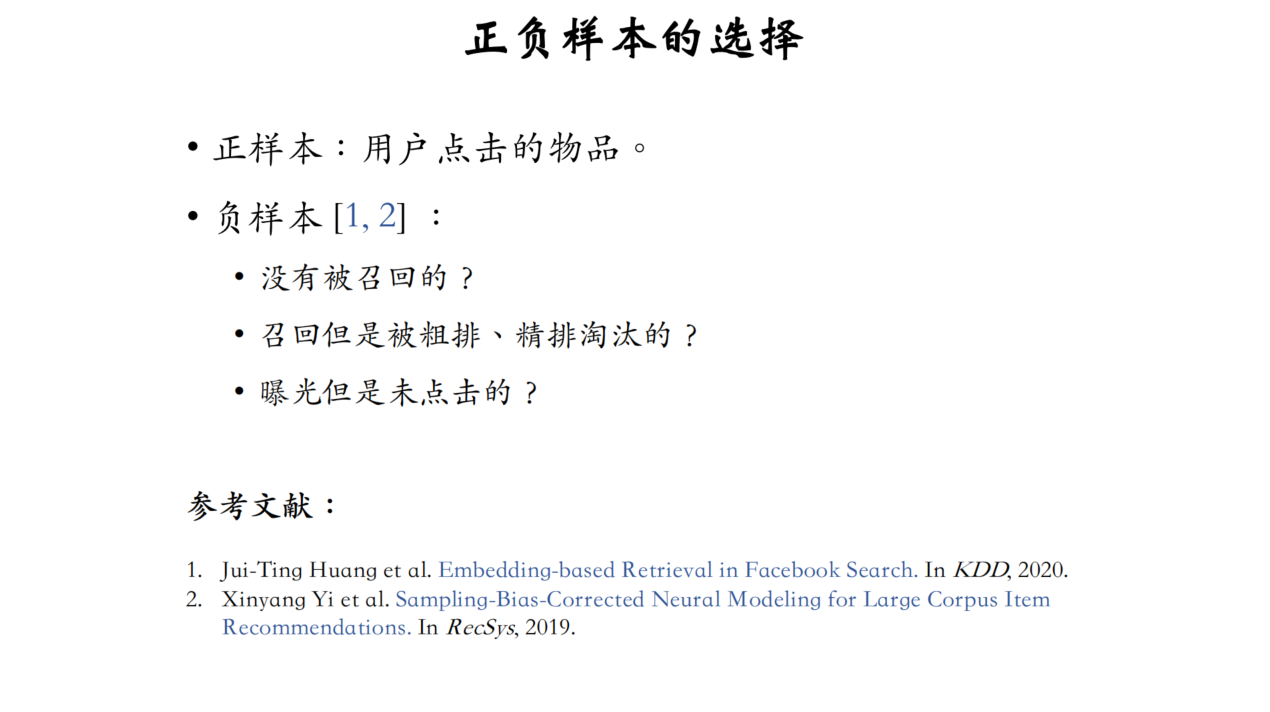

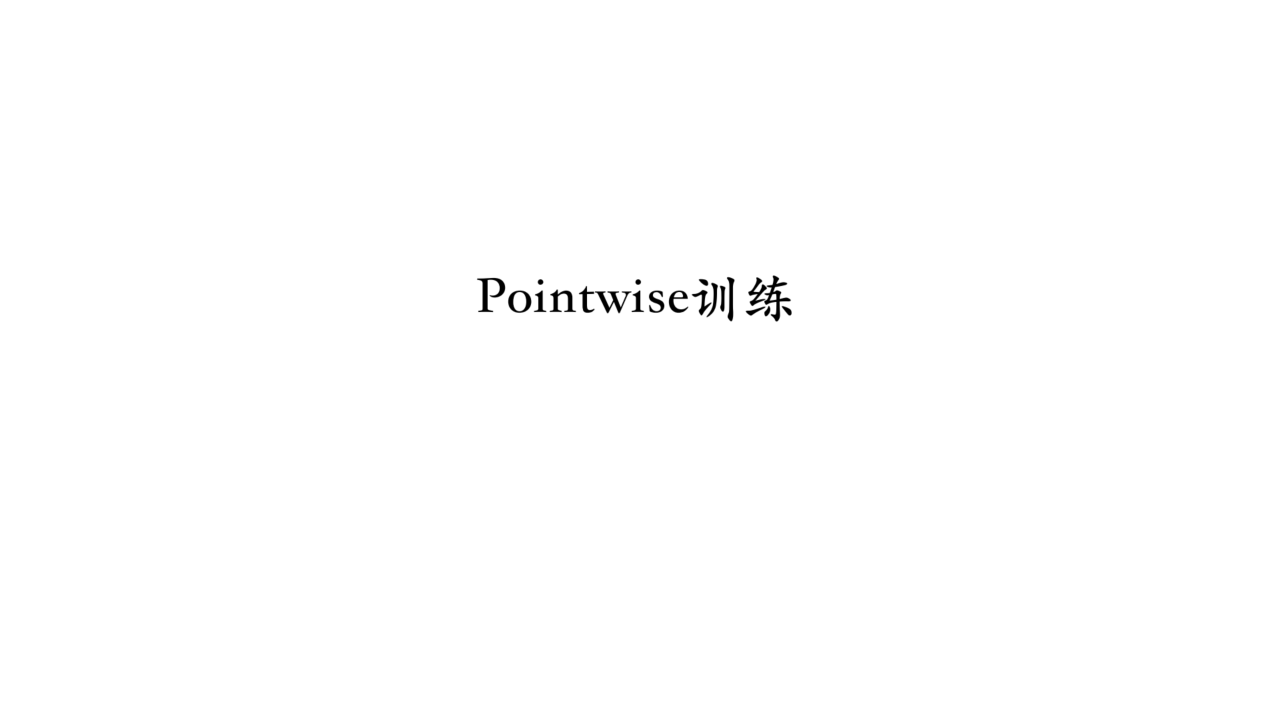

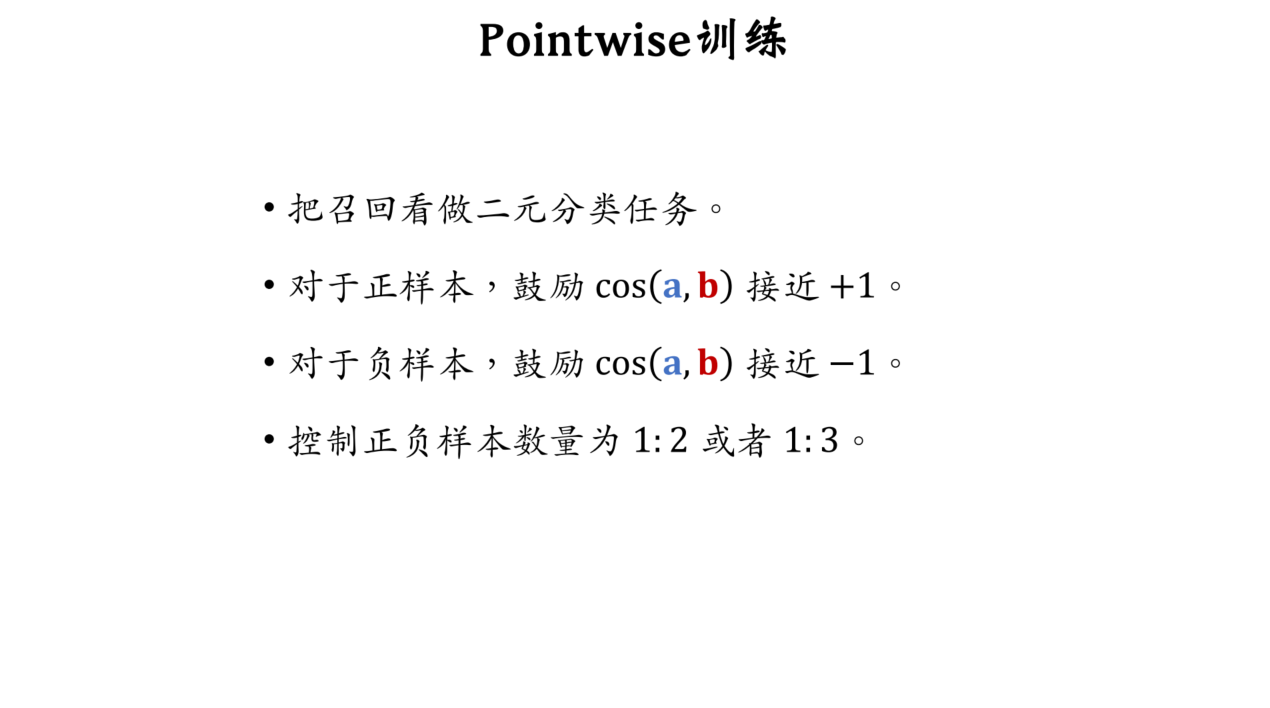

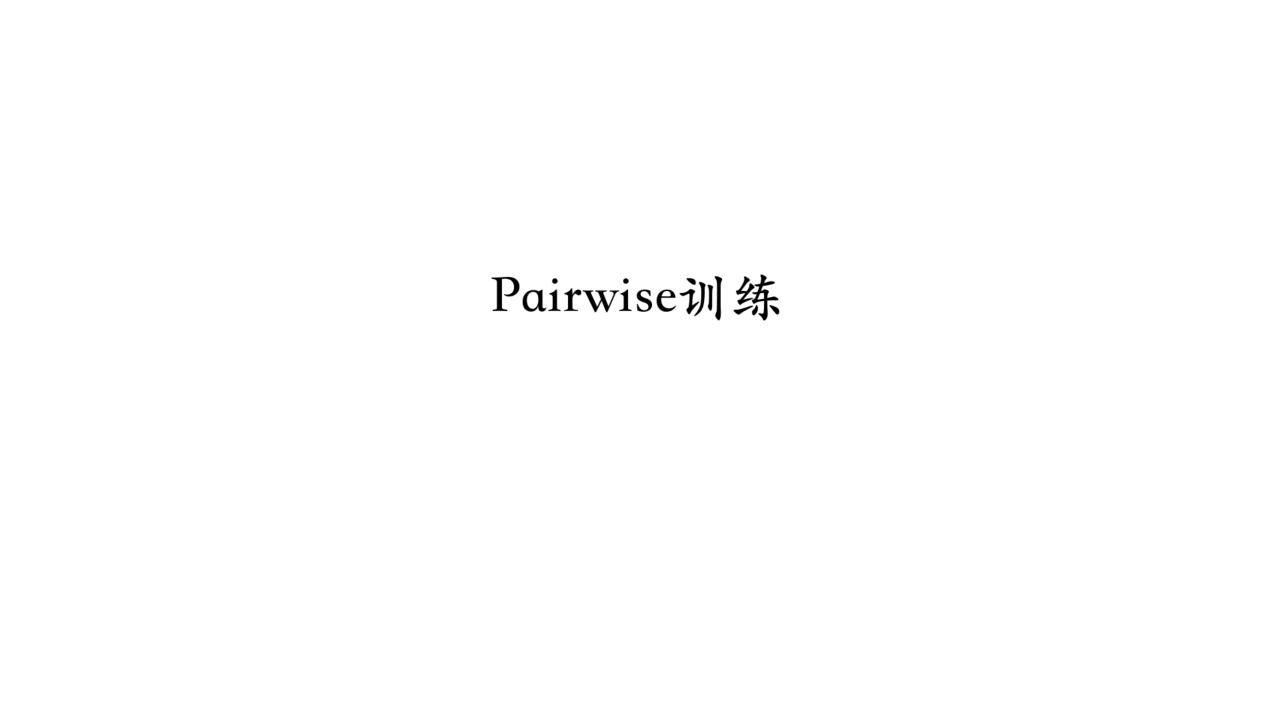

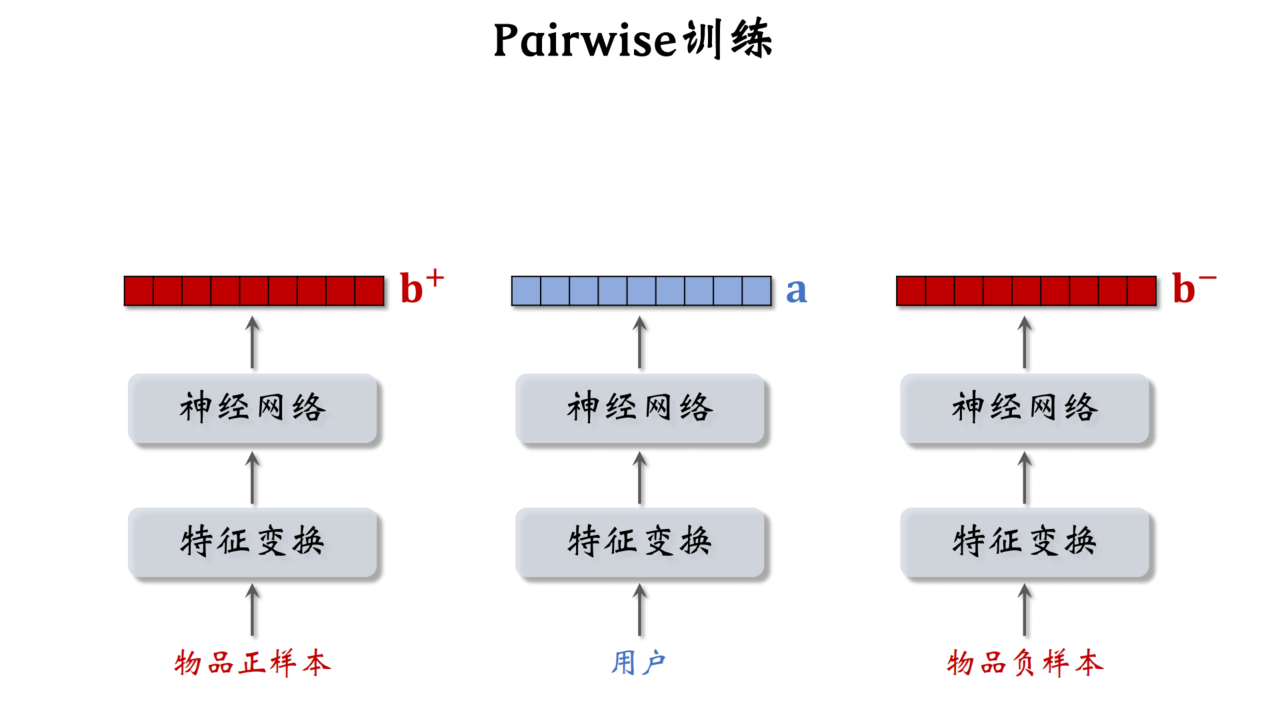

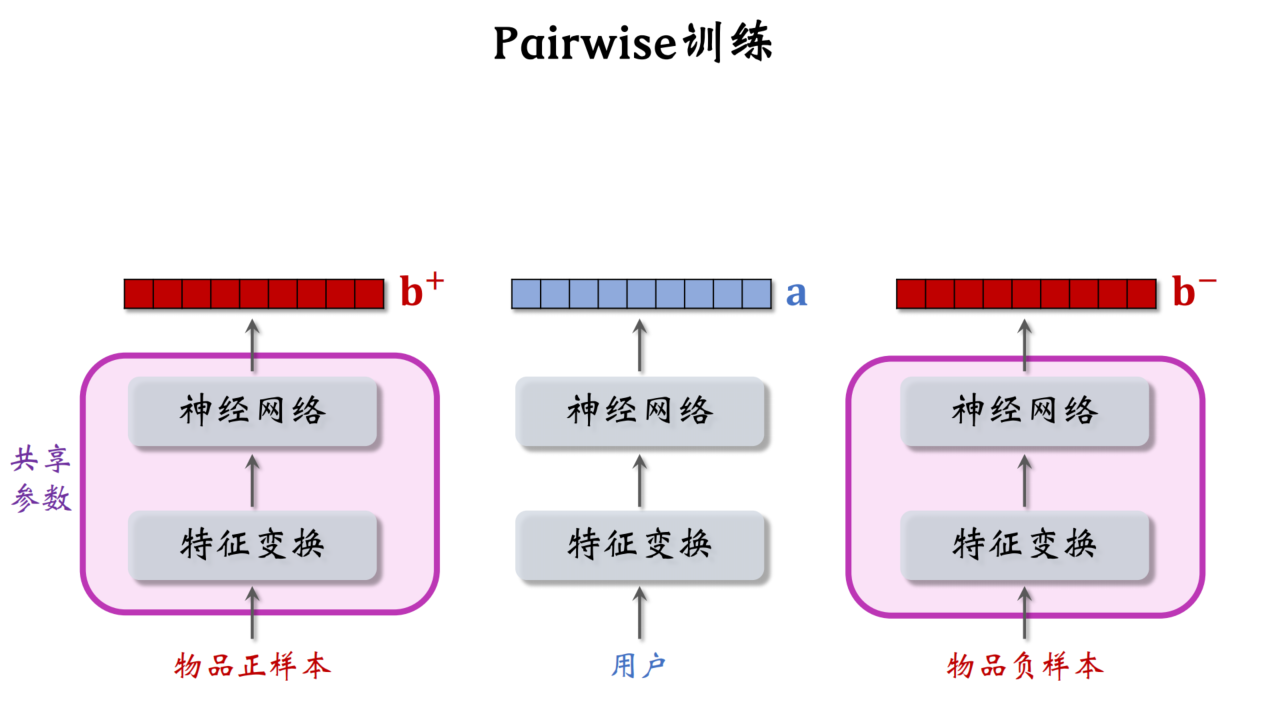

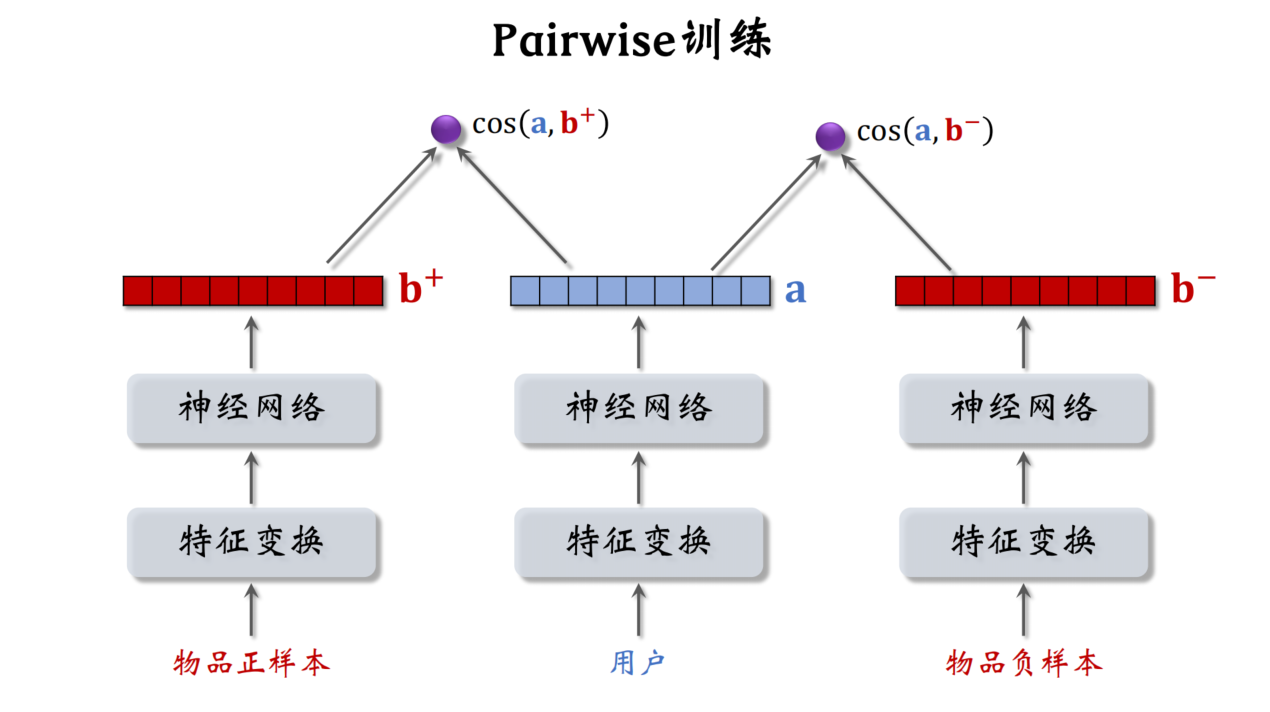

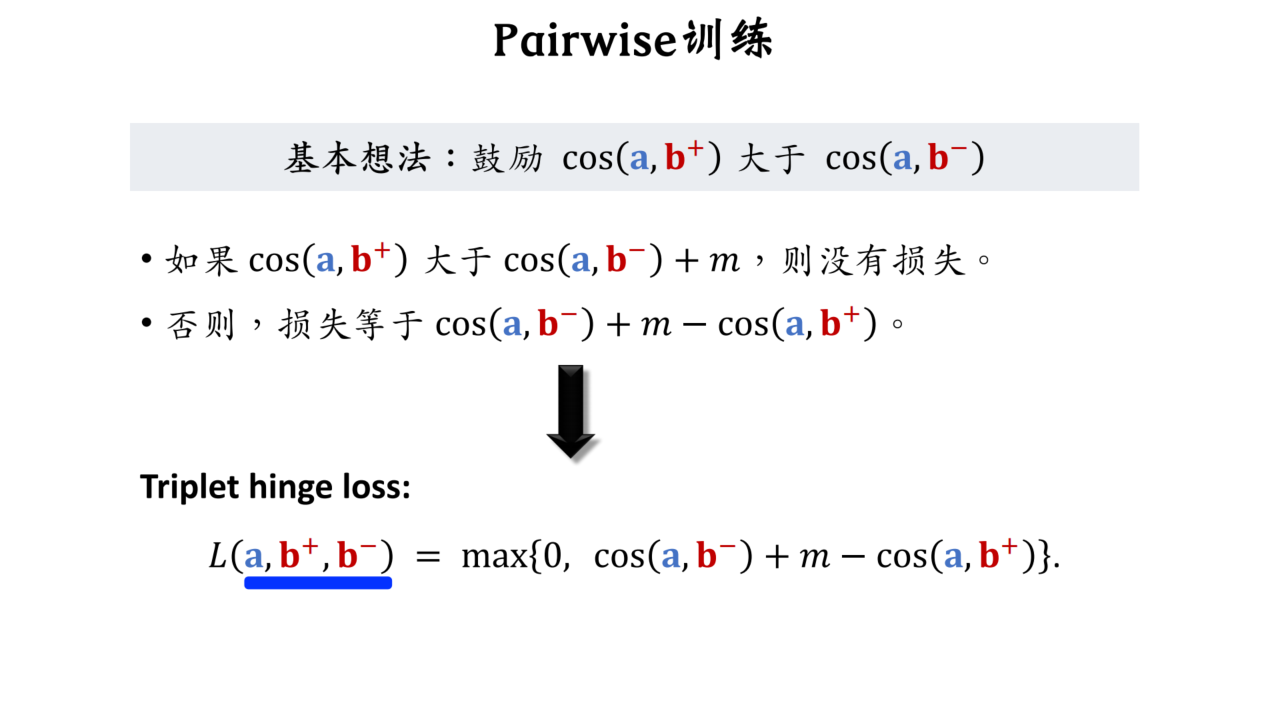

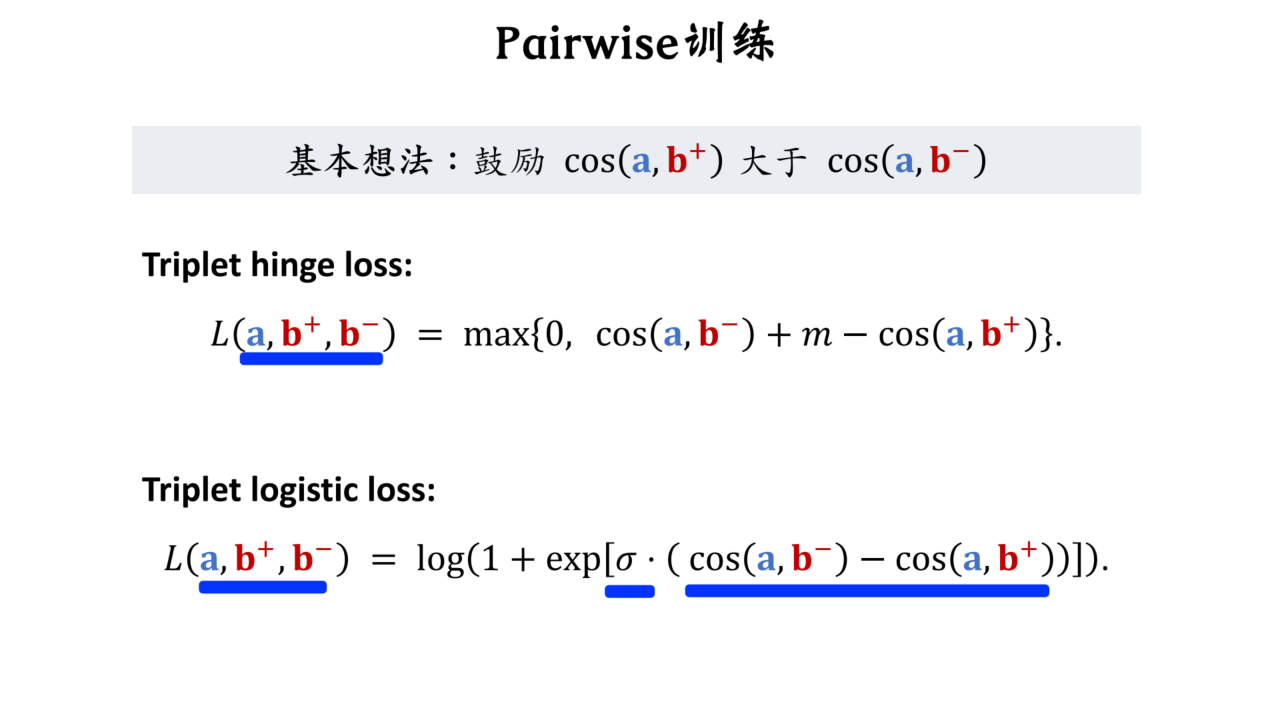

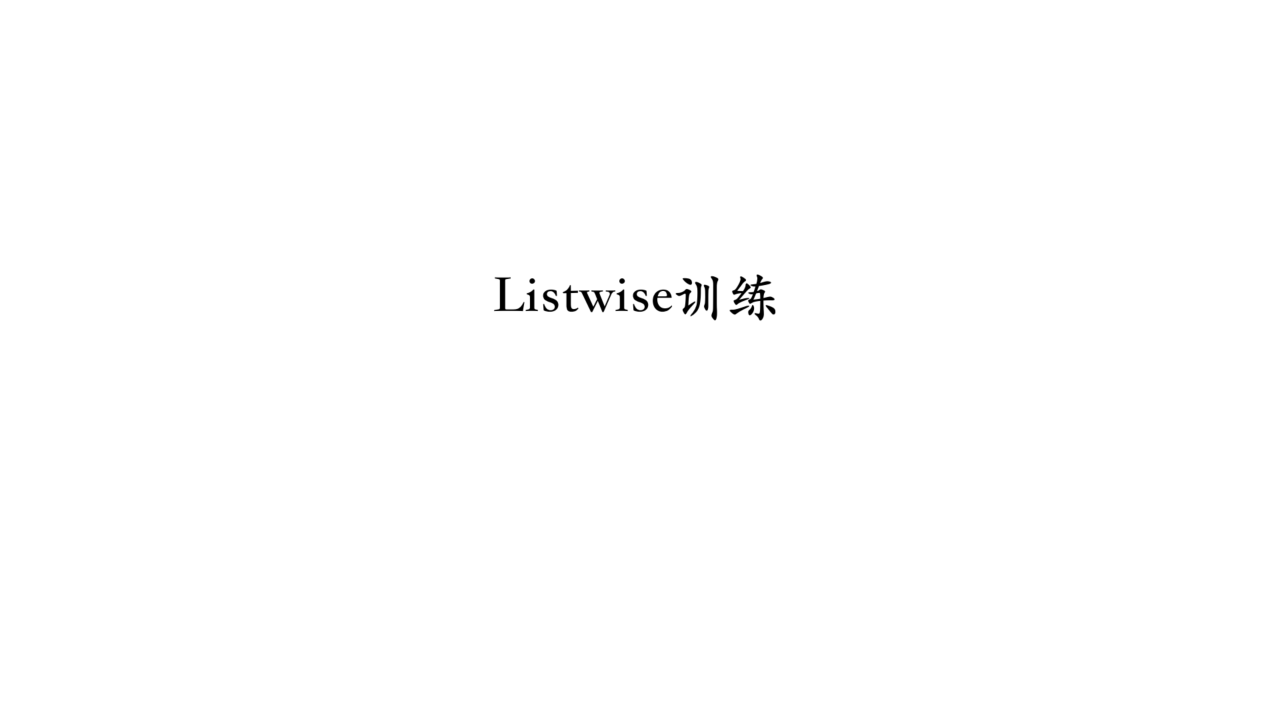

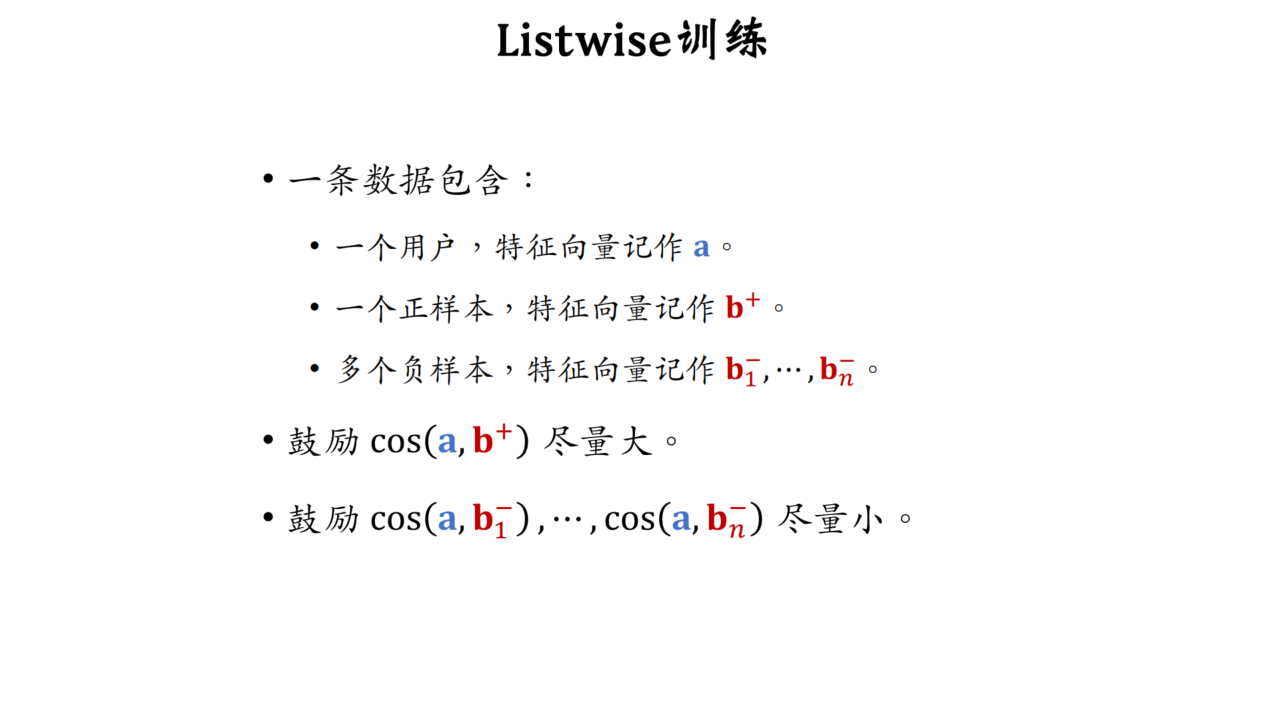

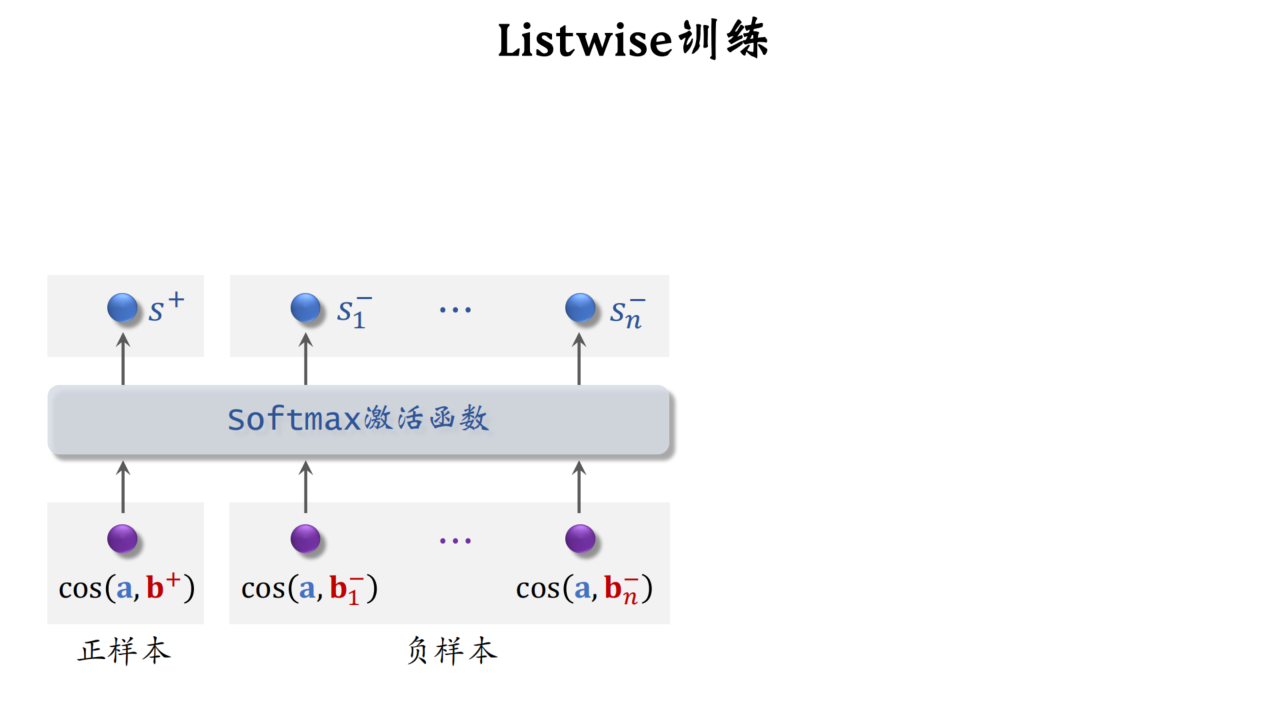

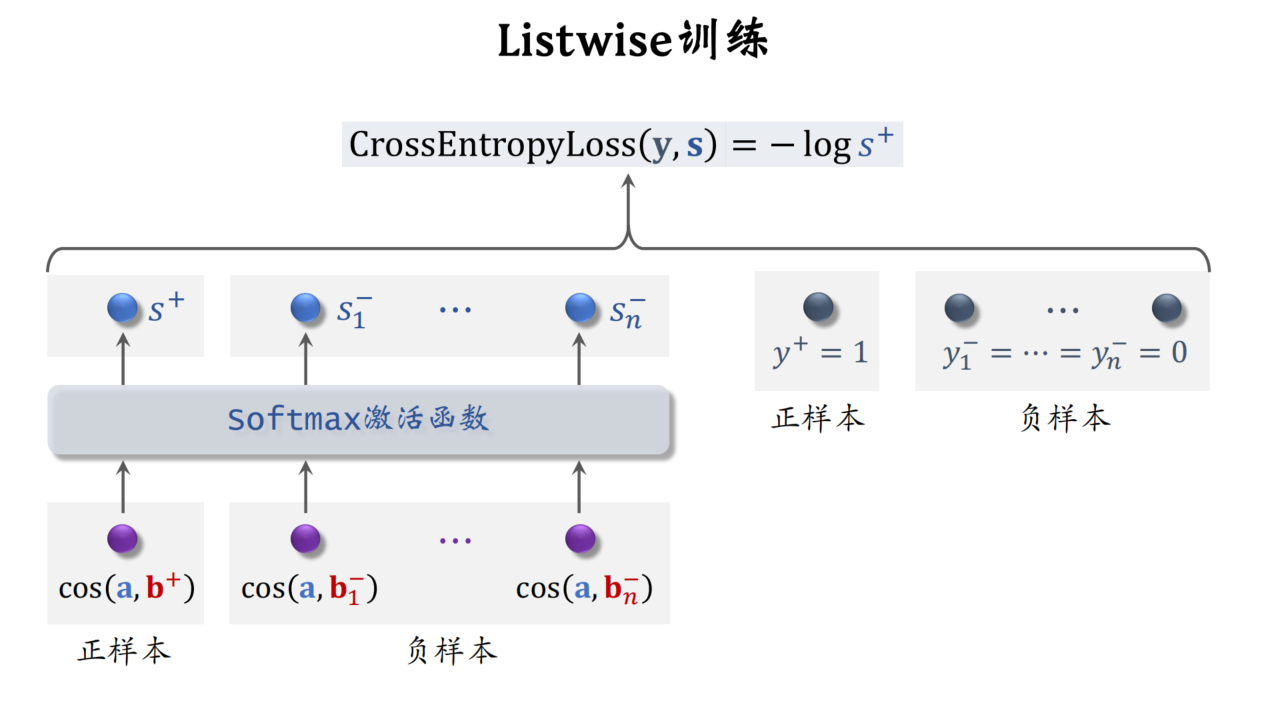

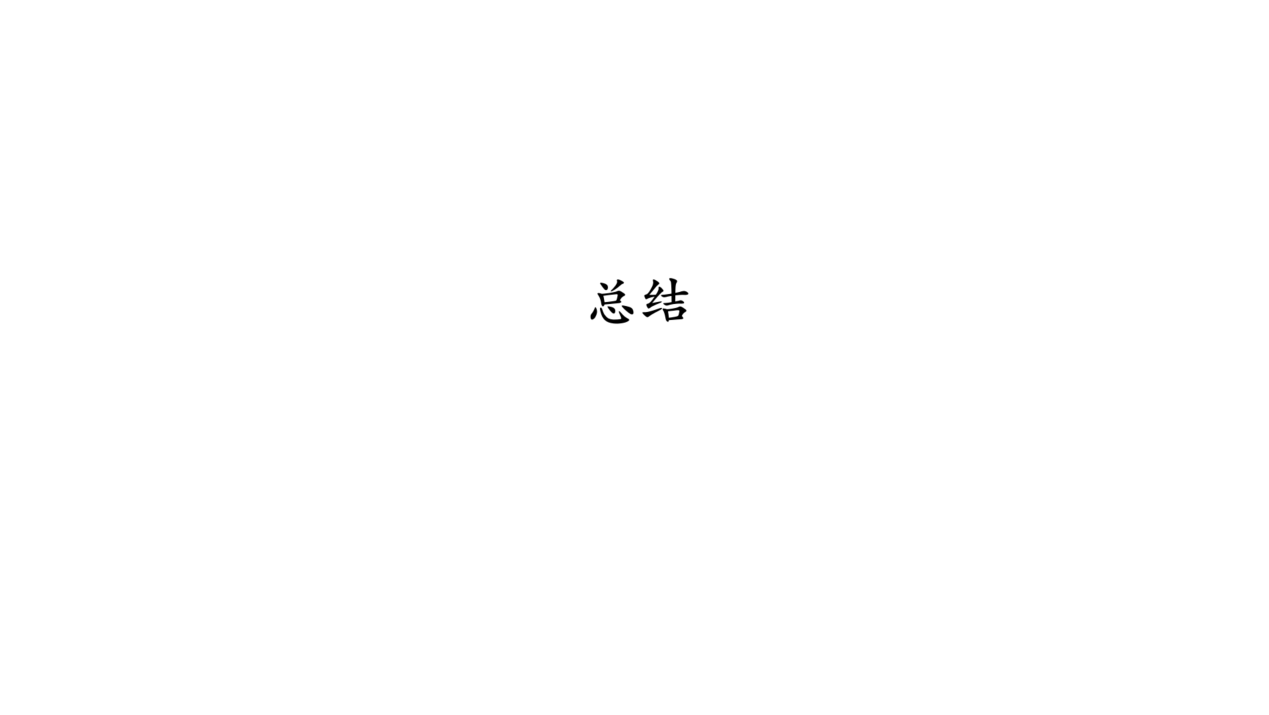

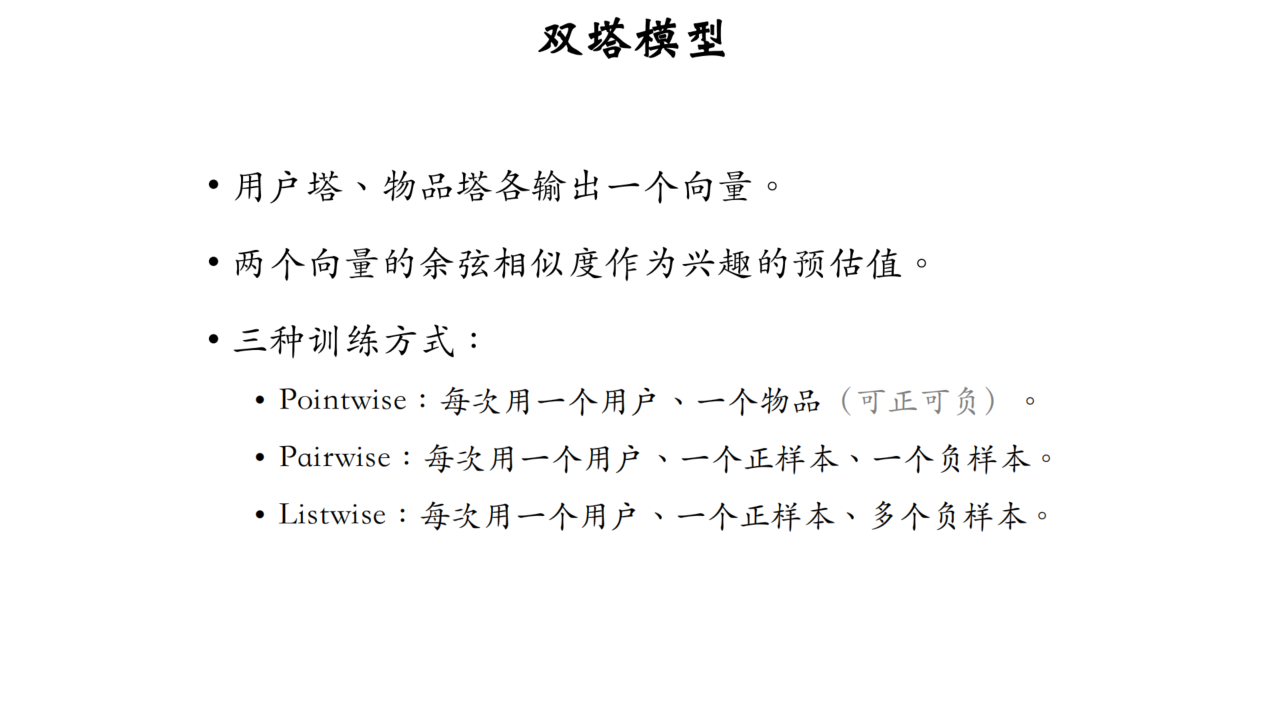

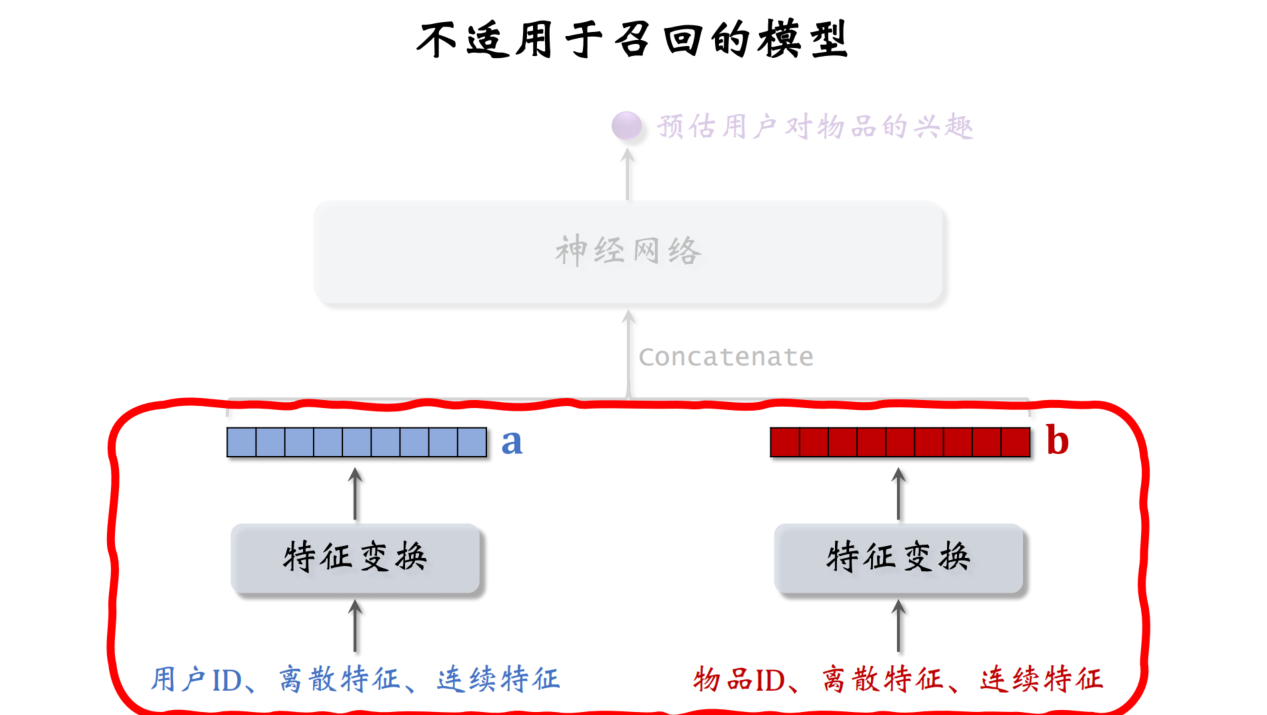

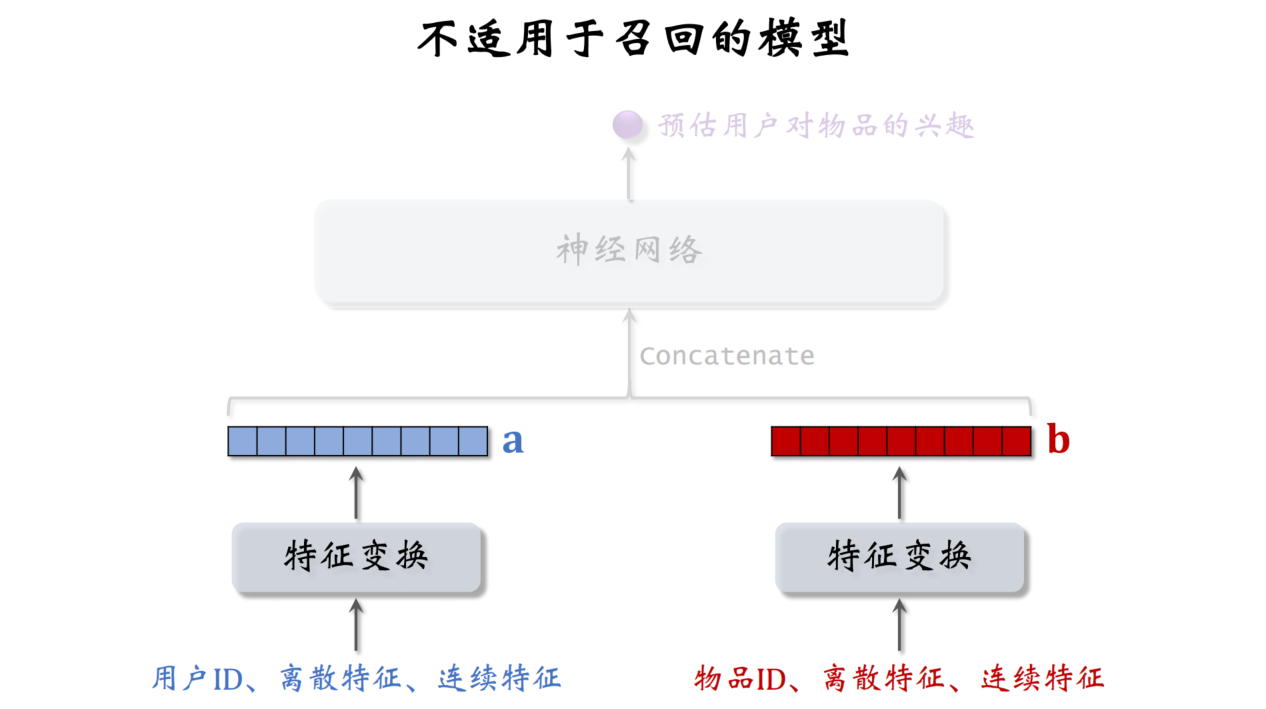

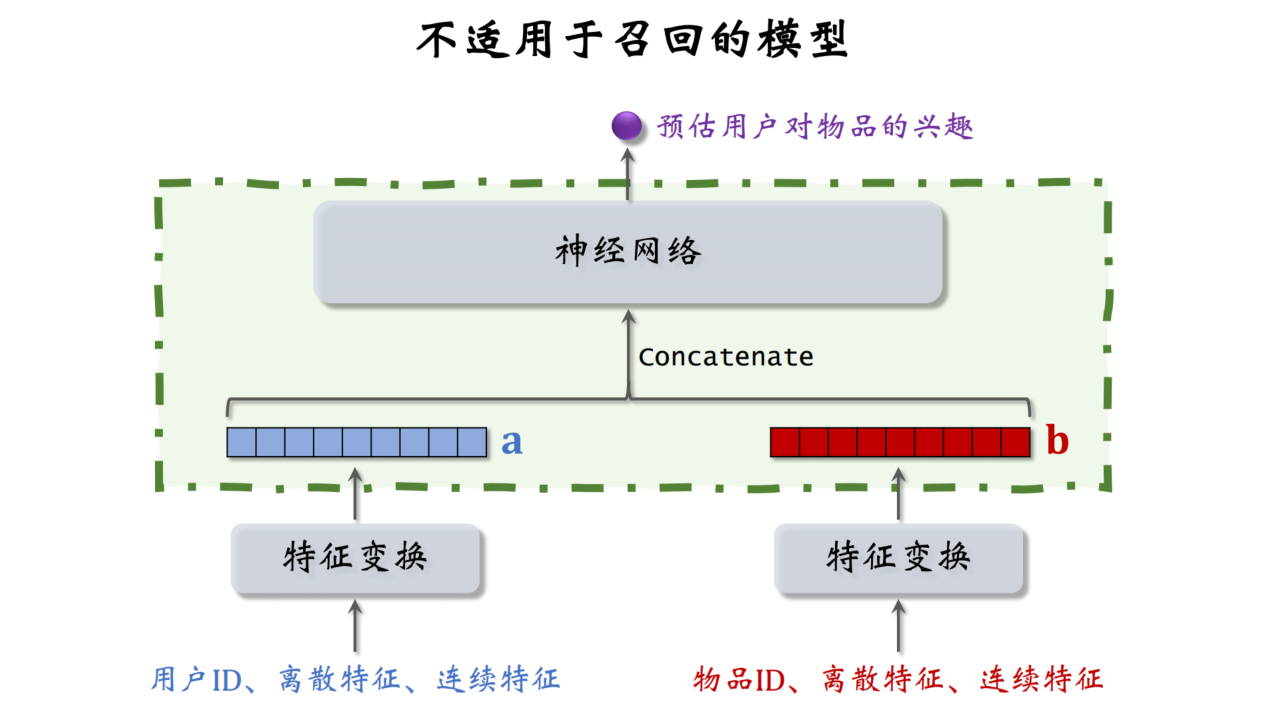

In [ ]:
## 心得

# 1、负样本选取思路：曝光未点击、未召回、被粗排/精排淘汰的

# 2、理解pointwise、pariwise和listwise：
# 1）Pointwise 仅考虑单个query和document的关系，会把将问题转化为多分类或回归问题，
# 对于分类问题，正负例可以通过用户的点击来构造。Pointwise 完全从单文档的分类角度计算，
#没有考虑文档之间的相对顺序。
# 2）pair wise是对每一个数据样本做一个比较关系，当一个文档比另一个文档相关排序更靠前的话，
# 就是正例，否则便是负例。pair wise的这种两两比较关系，对于排序问题是要好于point wise的。
# 对于这种排序关系，可以通过点击率、成交率、好评率等获取。
# 3）相对于尝试学习每一个样本是否相关或者两个文档的相对比较关系，列表法排序学习的基本思路
# 是尝试直接优化 NDCG这样的指标，从而能够学习到最佳排序结果

#1）pairwise是每次取一对样本，预估这一对样本的先后顺序，不断重复预估一对对样本，
#从而得到某条query下完整的排序。pair-wise损失在训练模型时，直接用两个物品的顺序关系来训练模型，
#就是说优化目标是物品A排序要高于物品B，类似这种优化目标。
#Pair-wise的方法是将同一个查询中两个不同的Item作为一个样本，主要思想是把rank问题转换为二值分类问题。
#2）对于pointwise而言，每次仅仅考虑一个样本，预估的是每一条和query的相关性，基于此进行排序。
#最简单的损失函数定义是Point-wise，就是输入用户特征和单个物品特征，对这个物品进行打分，物品之间的排序，
#就是谁应该在谁前面，不用考虑。
#Point-wise排序是将训练集中的每个Item看作一个样本获取rank函数，
#主要解决方法是把分类问题转换为单个item的分类或回归问题。
#3）Listwise同时考虑多个样本，找到最优顺序。List-wise的Loss更关注整个列表中物品顺序关系，
#会从列表整体中物品顺序的角度考虑，来优化模型。
#List-wise排序是将整个item序列看作一个样本


#Point-wise方法很好理解，即使用传统的机器学习方法对给定查询下的文档的相关度进行学习，
#比如CTR就可以采用PointWise的方法学习，但是有时候排序的先后顺序是很重要的，而Point-wise方法
#学习到全局的相关性，并不对先后顺序的优劣做惩罚。

#3、但是在实际应用的过程中，pairwise 用于推荐系统的排序任务时，效果却差于 pointwise？
#https://zhuanlan.zhihu.com/p/613354685

#4、我们线上用的pointwise方法训练ctr模型和播放时长回归模型。（工业界常用的还是 Pointwise 的排序学习模型。）
# 推荐位置关联性不那么强，例如运营强插、多样性等；
# 另一方面pointwise简单，性能好点（精排性能压力大）。

#5、一般LTR算法学习目标可大致分为三种：逐点（pointwise）、成对（pairwise）和逐列表（listwise）；
#但实际上用的较多的就是pairwise loss，pointwise虽简单且易扩展，但其只考虑单个Item与User的相关性，
#没有考虑item间的关系，这不能保证在模型损失达到全局最小值时可以生成最佳的排序列表。


#6、注意DSSM双塔召回模型和YoutubeDNN召回的区别：
#DSSM是分成用户塔和物品塔，预估两个的相似性。
#YoutubeDNN是一个多分类模型，更复杂。
